# Housing Price Prediction: Regression Problem

## Import Libraries

In [46]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats


# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from sklearn.preprocessing import StandardScaler


# for the model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import pickle


pd.set_option("display.max.columns", None)

## Load the Dataset

In [2]:
df = pd.read_csv("housePrices.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Analysis

### Types of Variables

Let's go ahead and find out what types of variables there are in this dataset

In [3]:
# let's inspect the type of variables in pandas

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type **int** and **float** and categorical those of type **object**.

#### Find Categorical Variables

In [4]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("There are {} categorical variables".format(len(categorical)))

There are 43 categorical variables


In [5]:
df[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [64]:
for column in df[categorical].columns:
    print(column, df[column].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

#### Find temporal variables

There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:


In [6]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!= 'O']

# list of variables that contain year information
years_var = [var for var in numerical if 'Yr' in var or 'Year' in var]

years_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
df[years_var].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold for example. We are going to do that in the feature engineering section later in the notebook.

We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:

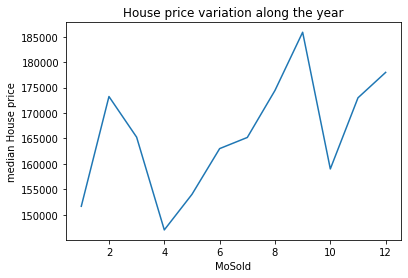

In [8]:
df.groupby('MoSold')['SalePrice'].median().plot()
plt.title('House price variation along the year')
plt.ylabel('median House price')
plt.show()

The price seems to vary depending on the month in which the house is sold.

#### Find discrete variables

To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [9]:
discrete = []
for var in numerical:
    if len(df[var].unique()) <20 and var not in years_var:
        print(var, 'values: ', df[var].unique())
        discrete.append(var)
print()        
print("There are {} discrete variables".format(len(discrete)))

MSSubClass values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath values:  [1 0 2 3]
BsmtHalfBath values:  [0 1 2]
FullBath values:  [2 1 3 0]
HalfBath values:  [1 0 2]
BedroomAbvGr values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr values:  [1 2 3 0]
TotRmsAbvGrd values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values:  [0 1 2 3]
GarageCars values:  [2 3 1 0 4]
PoolArea values:  [  0 512 648 576 555 480 519 738]
MoSold values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


#### Find continuous variables

In [10]:
numerical = [var for var in numerical if var not in discrete and var not in ['Id','SalePrice'] and var not in years_var]

print("There are {} numerical and continuous variables".format(len(numerical)))


There are 18 numerical and continuous variables


Perfect!! Now we have inspected and have a view of the different types of variables that we have in the house price dataset. Let's move on to understand the types of problems that these variables have.



### Types of problems with the variables

#### Missing values

In [11]:
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, df[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


#### Outliers and distributions

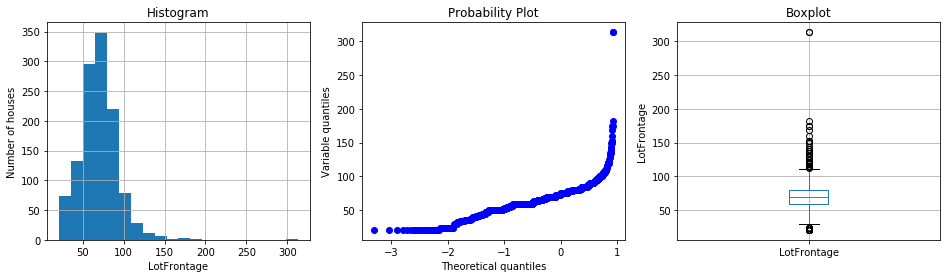

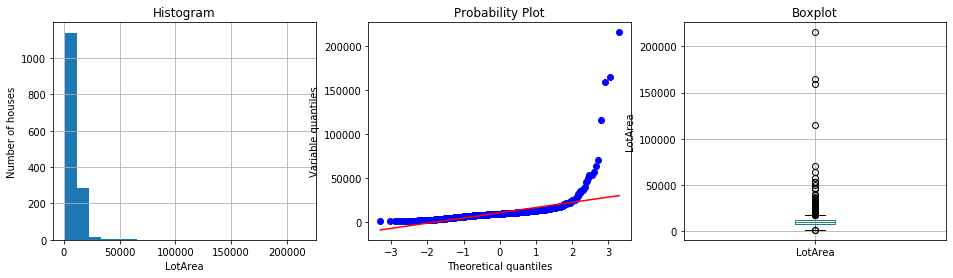

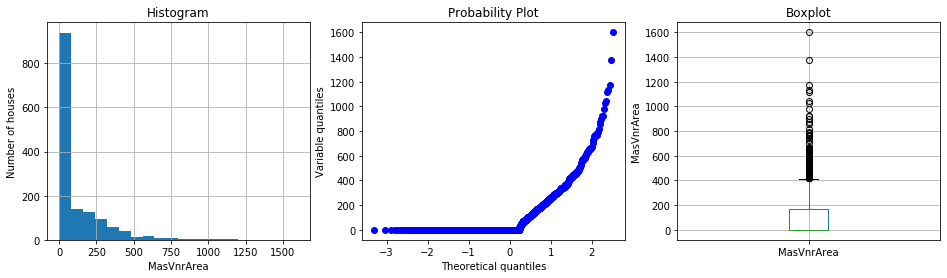

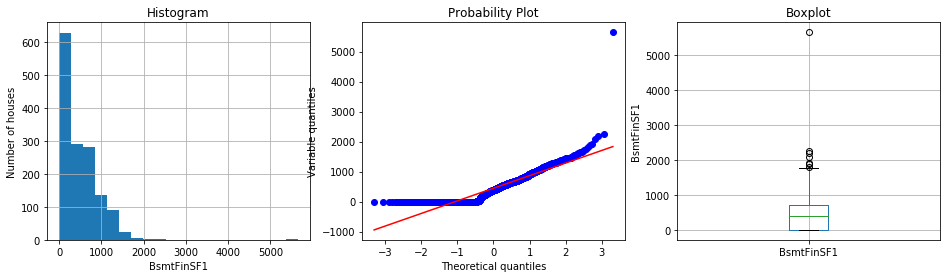

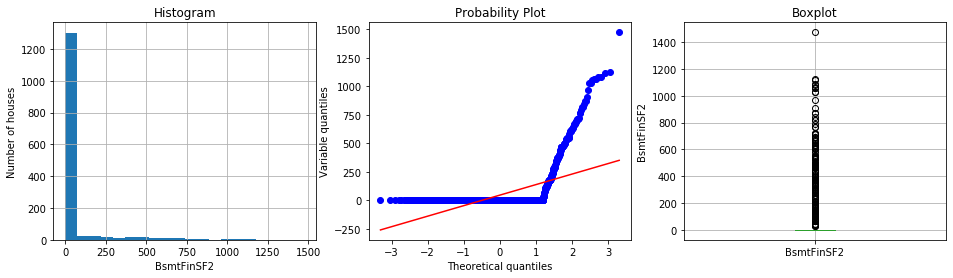

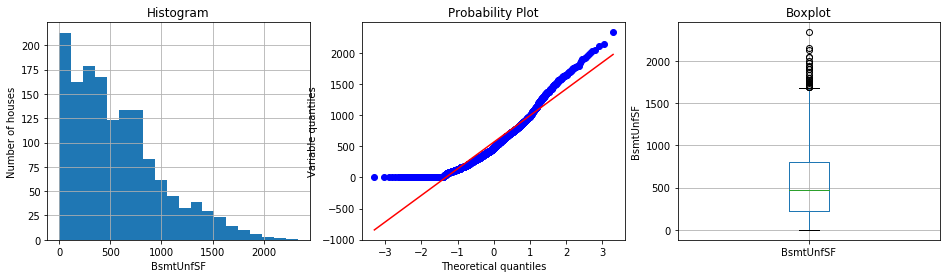

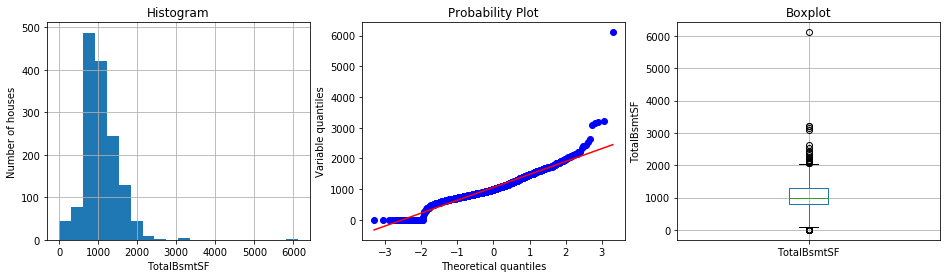

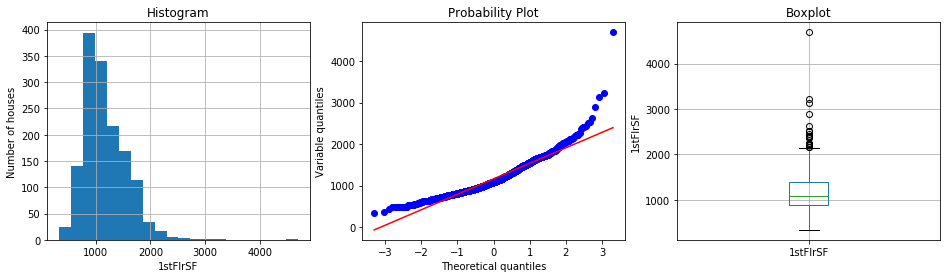

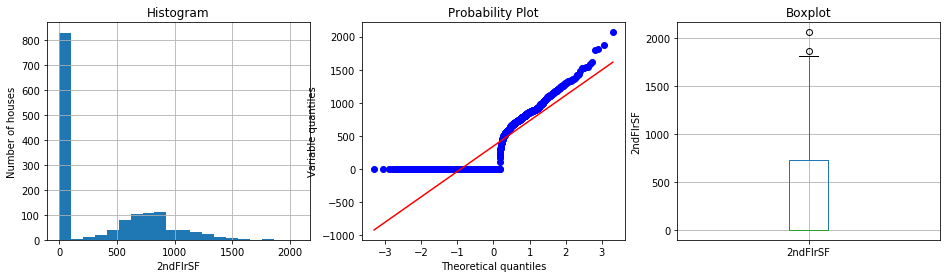

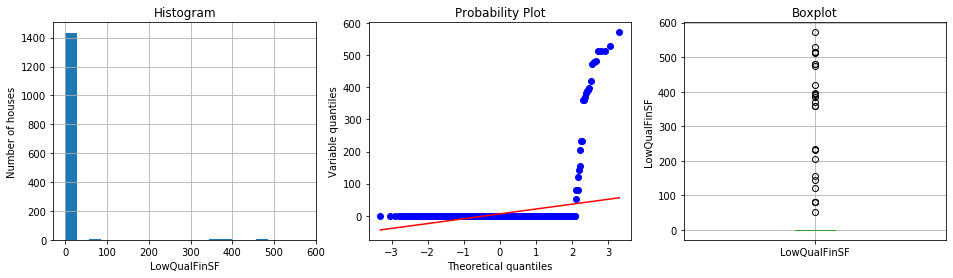

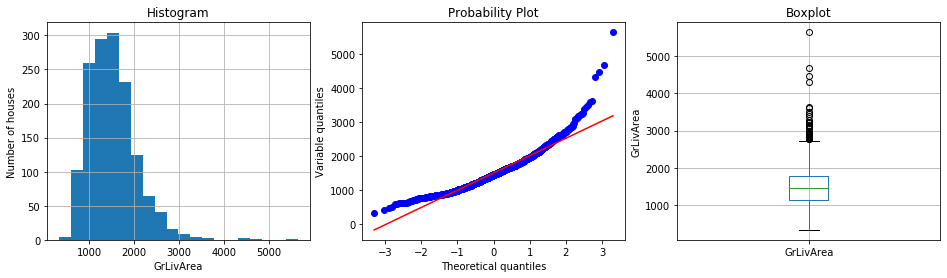

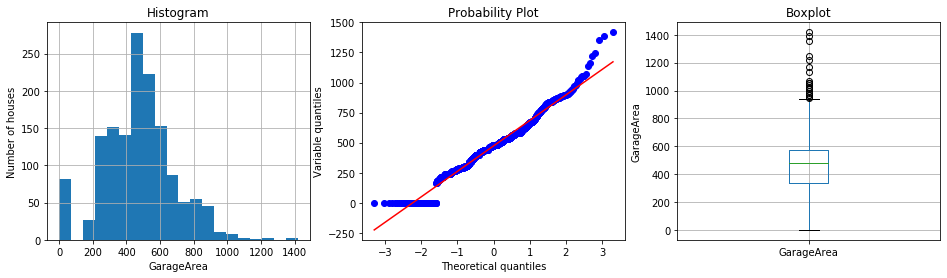

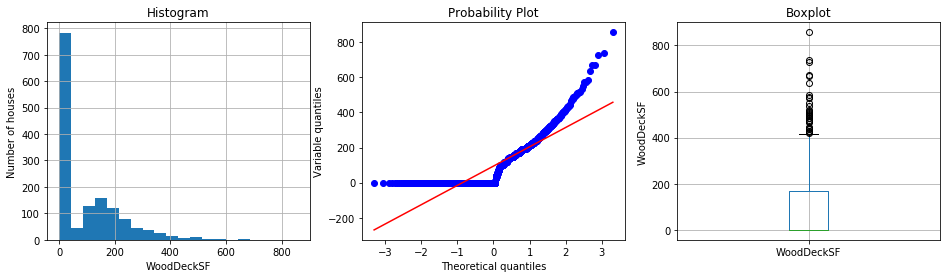

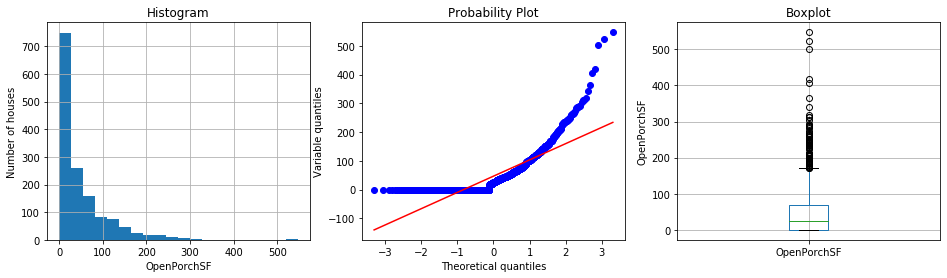

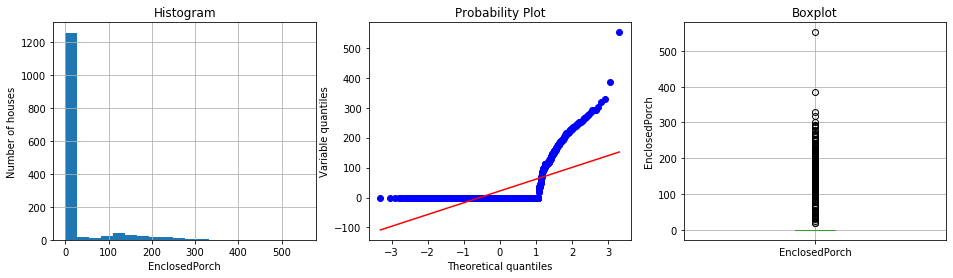

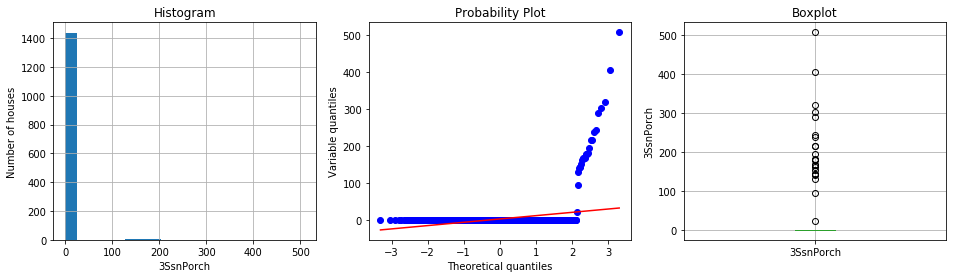

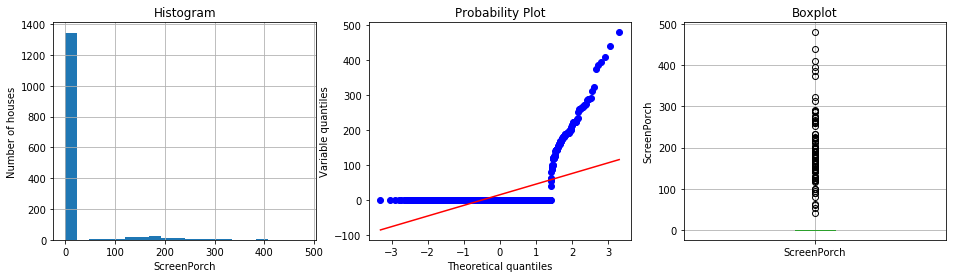

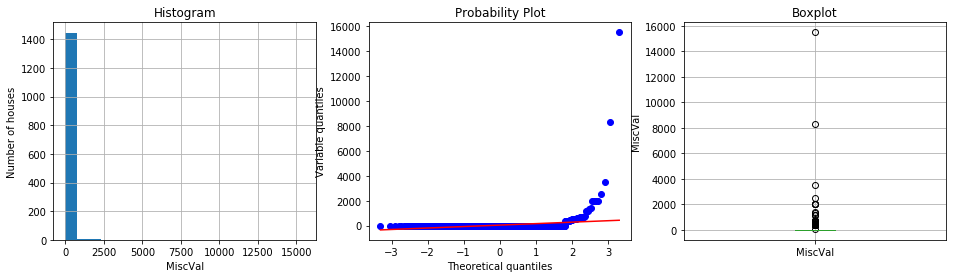

In [12]:
for var in numerical:
    
    # define figure size
    plt.figure(figsize = (16,4))
    
    # histogram
    plt.subplot(1,3,1)
    fig = df[var].hist(bins =20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)
    fig.set_title('Histogram')
    
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    
    
    # boxplot
    plt.subplot(1,3,3)
    fig = df.boxplot(column =var)
    fig.set_title('Boxplot')
    fig.set_ylabel(var)

    
    plt.show()

The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. As we are planning to build linear regression, we need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. I will follow discretisation with encoding of the intervals following the target mean

#### Outliers in discrete variables

Now, let's identify outliers in the discrete variables. I will call outliers those values that are present in less than 5 % of the houses. This is exactly the same as finding rare labels in categorical variables.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


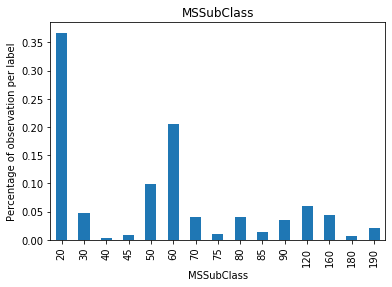

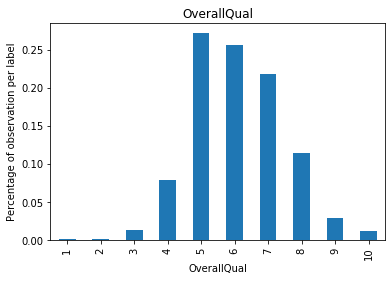

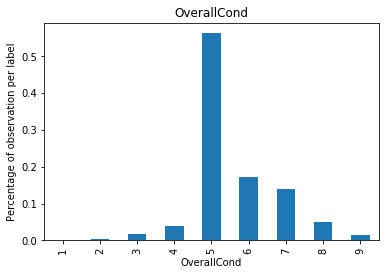

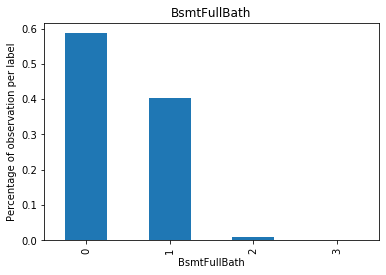

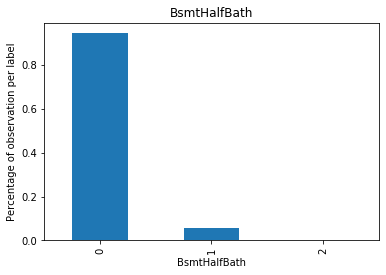

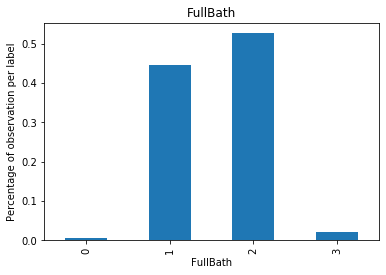

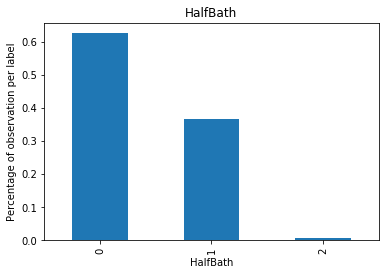

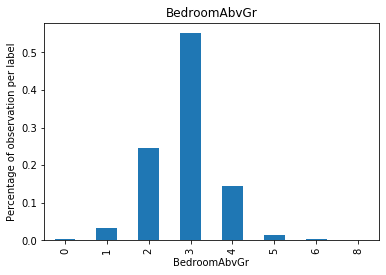

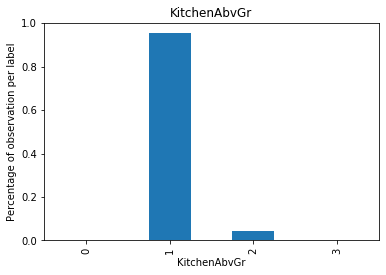

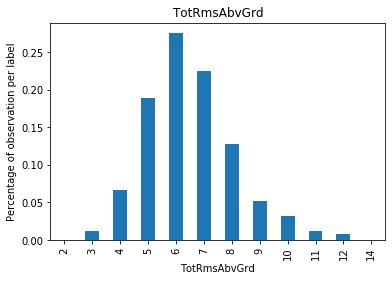

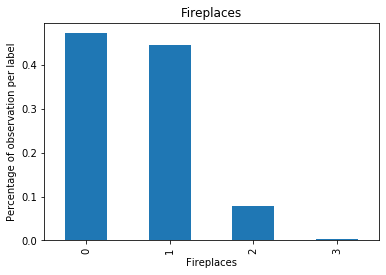

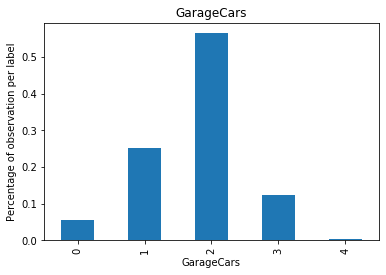

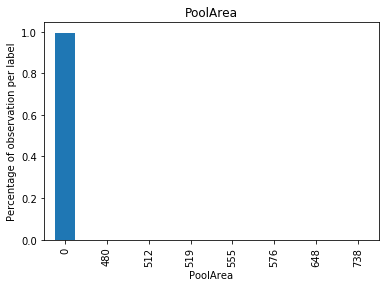

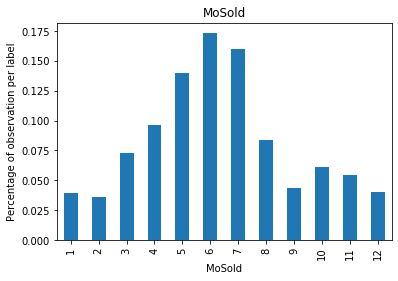

In [13]:
for var in discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observation per label')
    plt.title(var)
    plt.show()

Most of the discrete variables show values that are shared by a tiny proportion of houses in the dataset.

### Monotonicity between discrete variables and target values

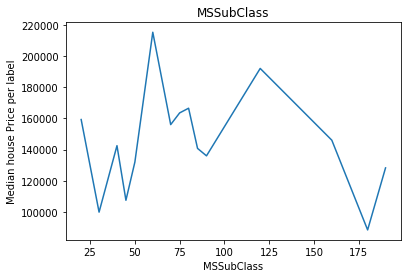

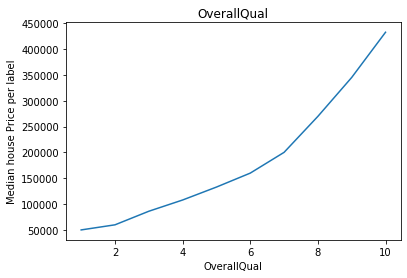

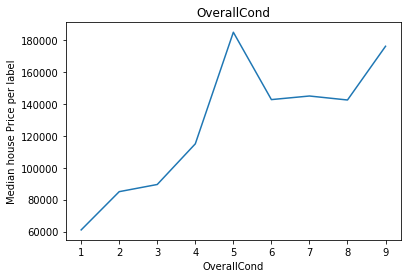

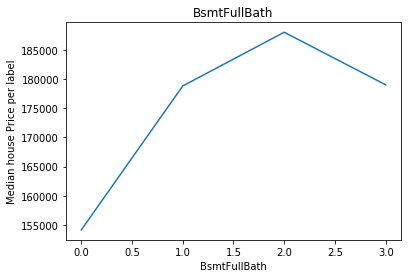

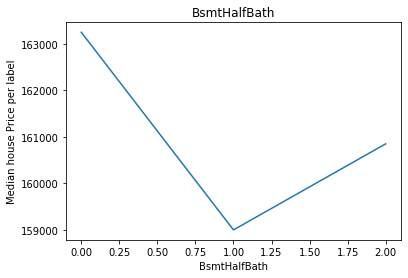

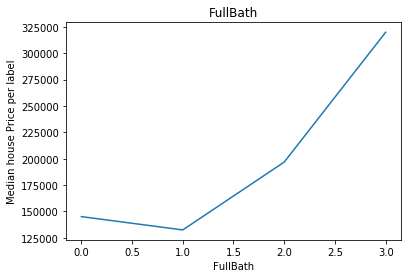

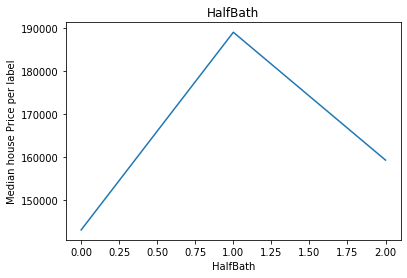

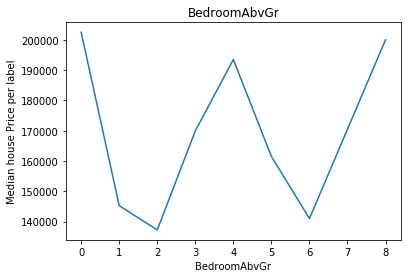

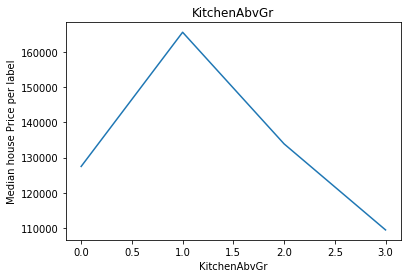

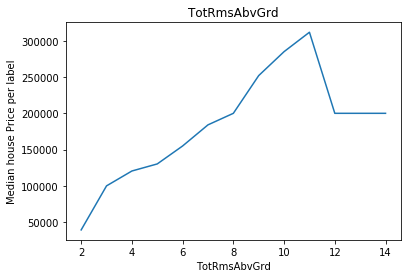

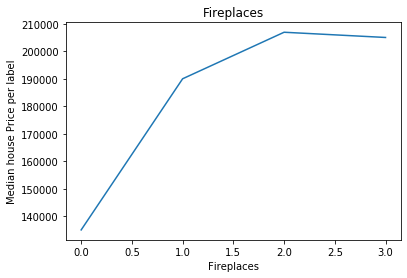

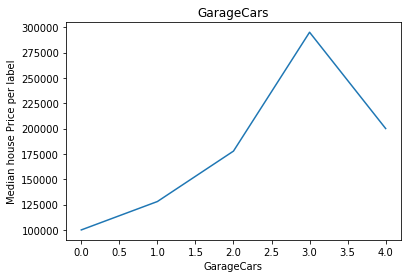

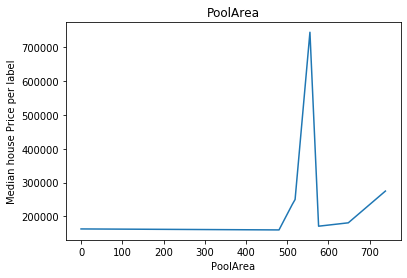

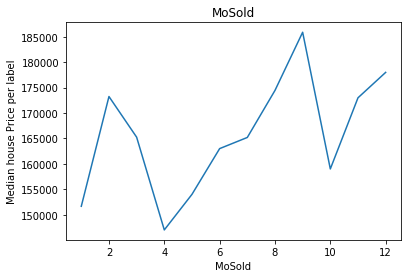

In [14]:
for var in discrete:
    df.groupby(var)['SalePrice'].median().plot()
    plt.ylabel('Median house Price per label')
    plt.title(var)
    plt.show()

Some of the discrete variables show some sort of monotonic relationship and some don't.

#### Number of labels: cardinality

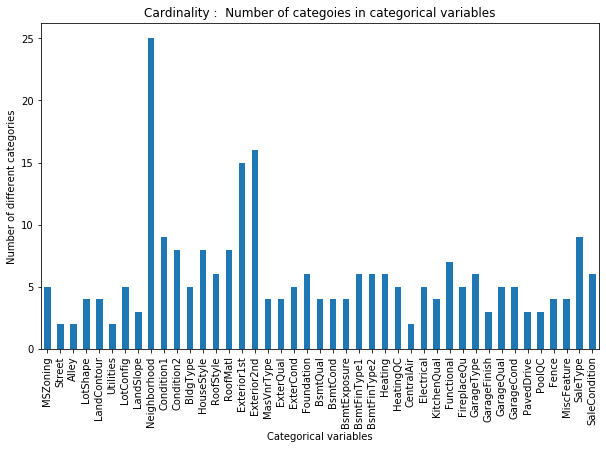

In [15]:
df[categorical].nunique().plot.bar(figsize = (10,6))
plt.title('Cardinality :  Number of categoies in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')
plt.show()

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality. That is good news!

Very likely though, they contain rare labels. let's see by plotting the frequency charts

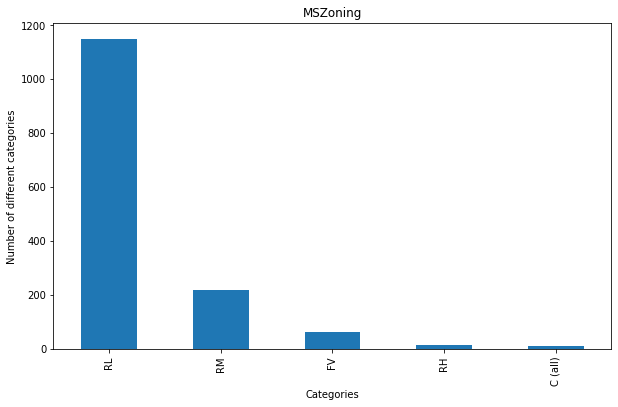

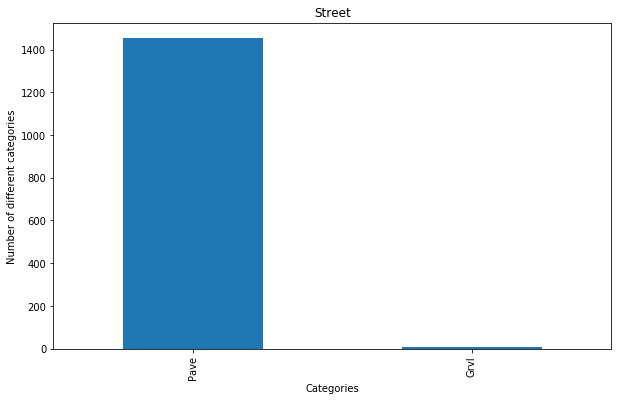

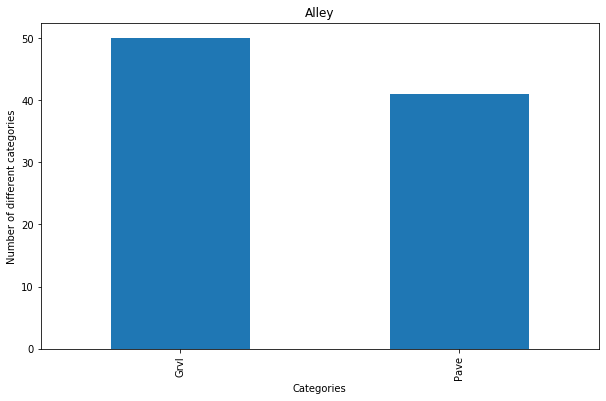

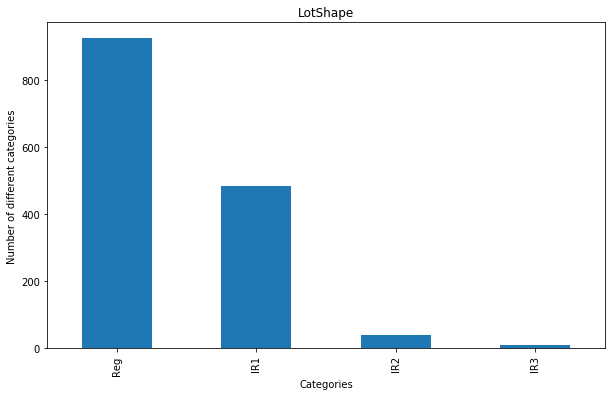

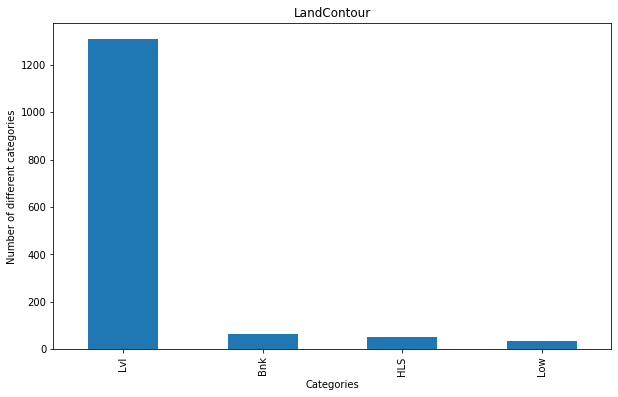

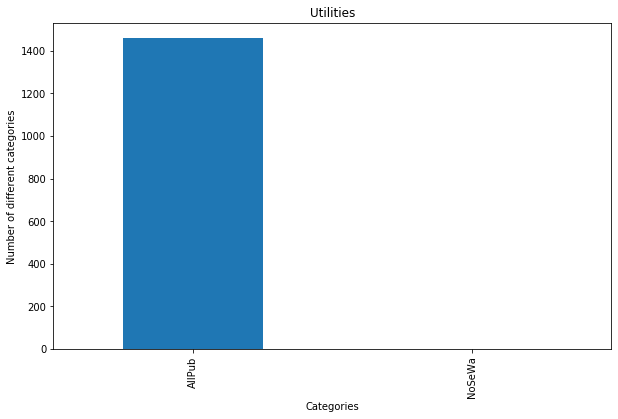

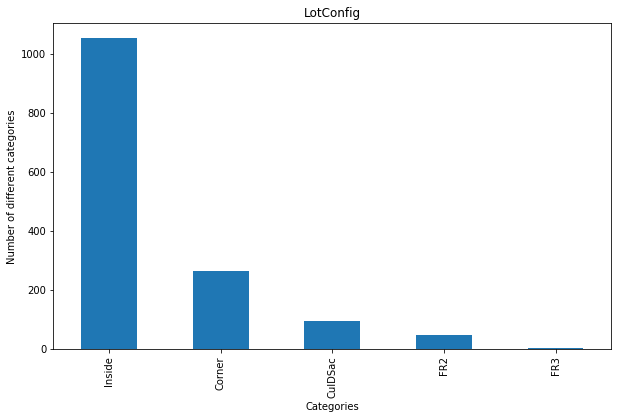

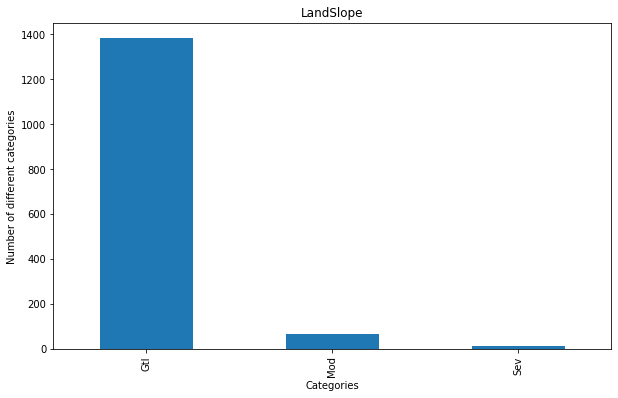

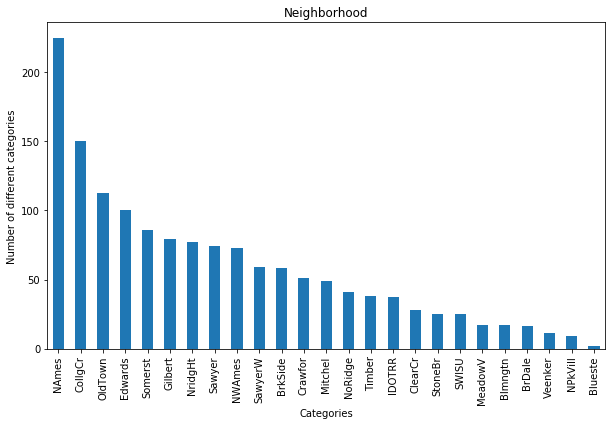

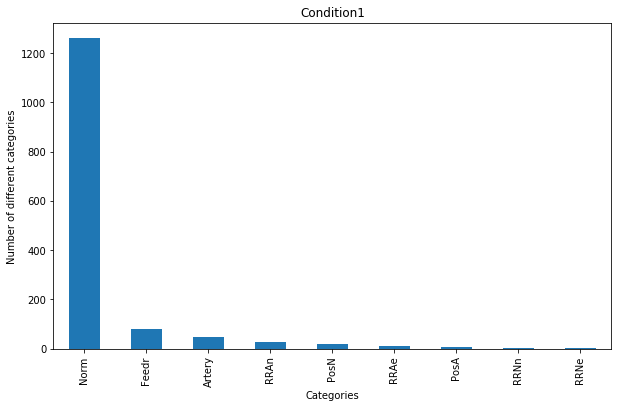

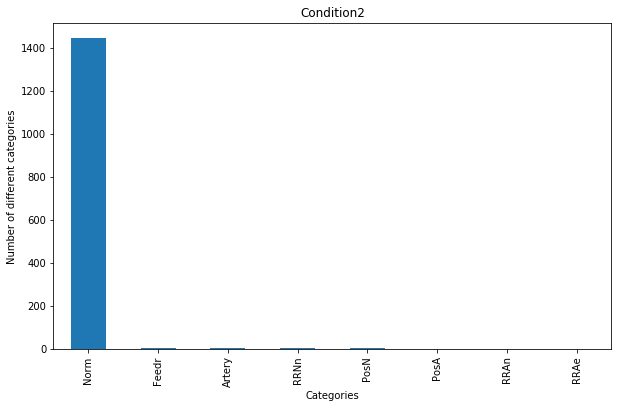

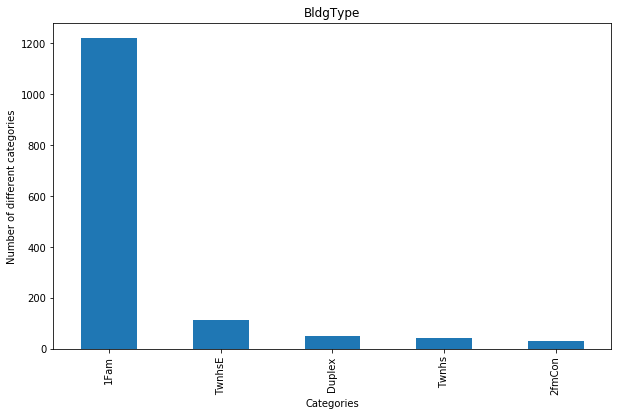

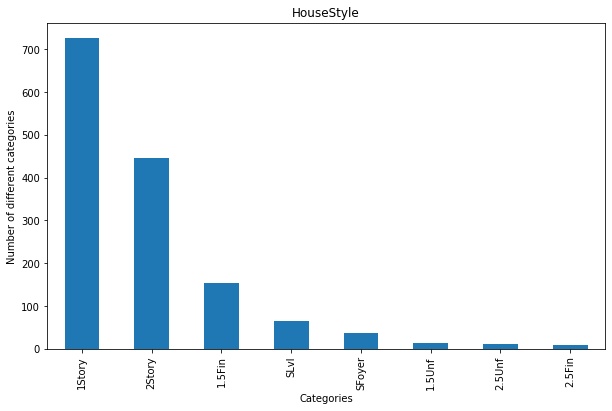

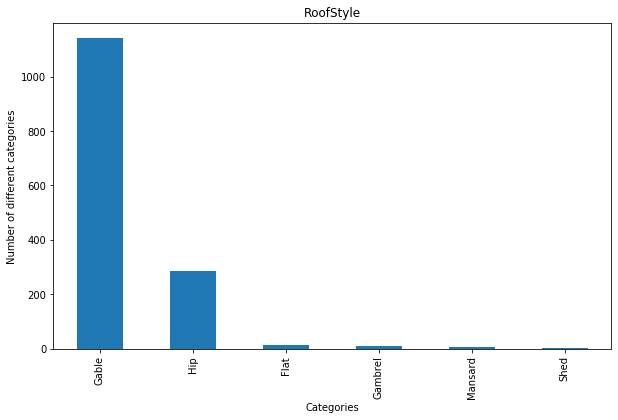

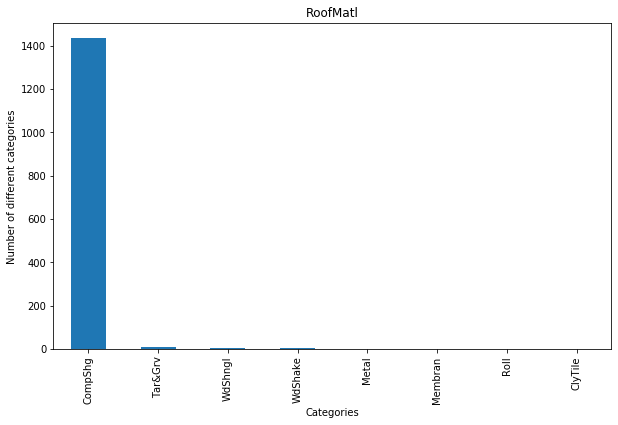

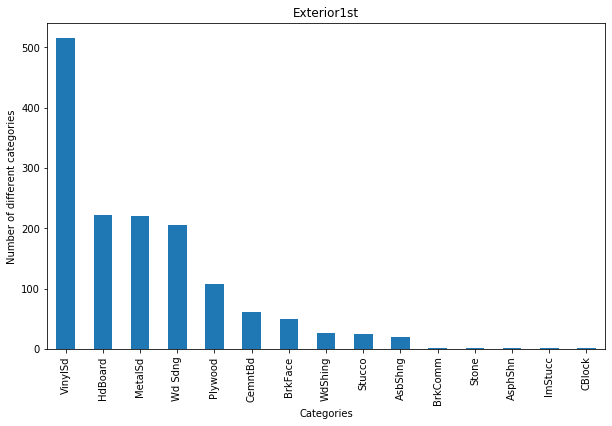

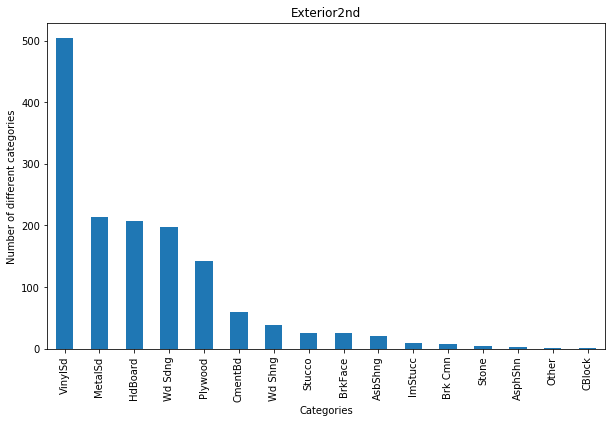

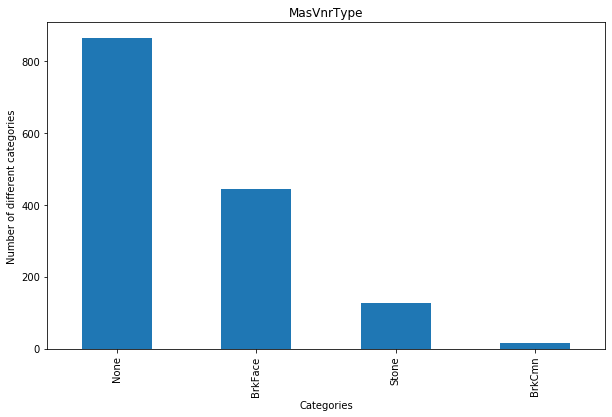

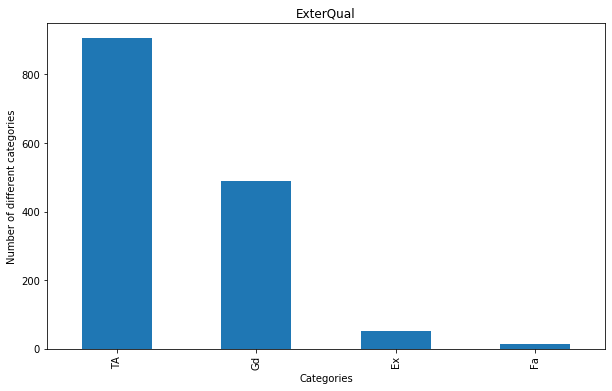

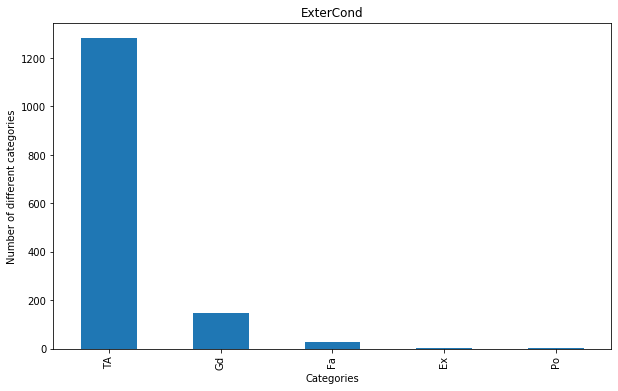

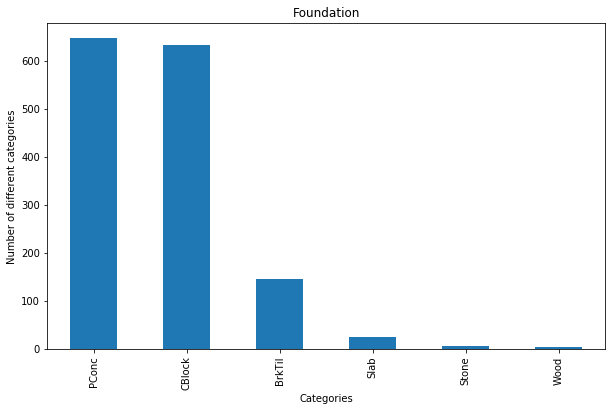

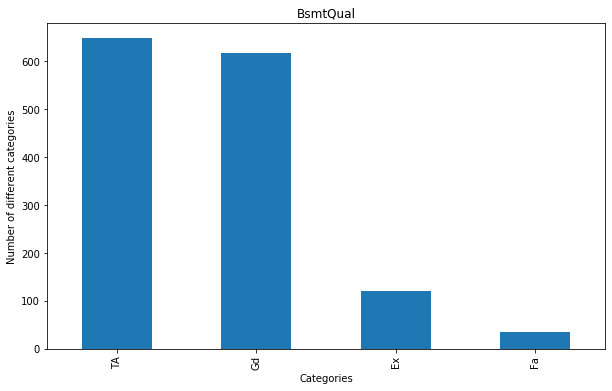

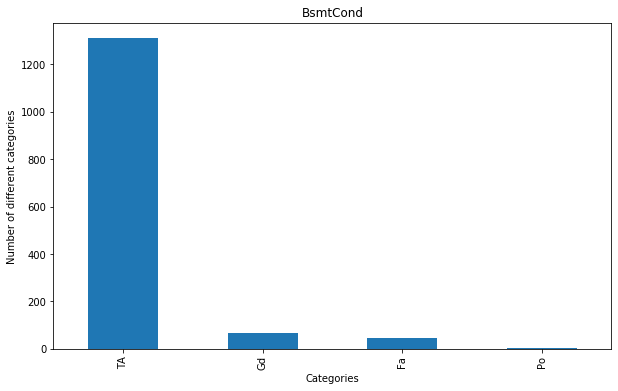

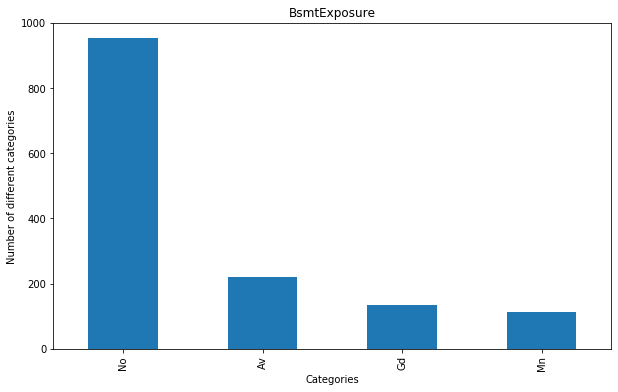

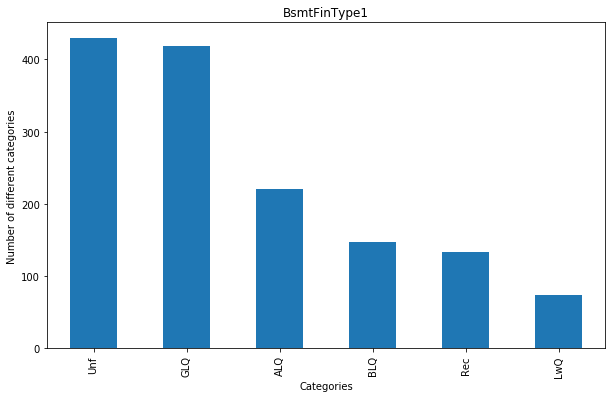

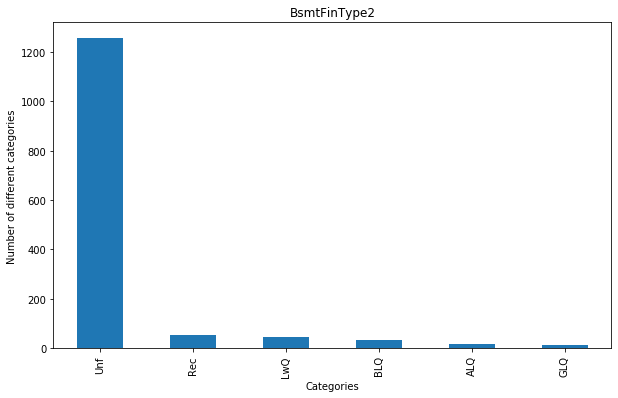

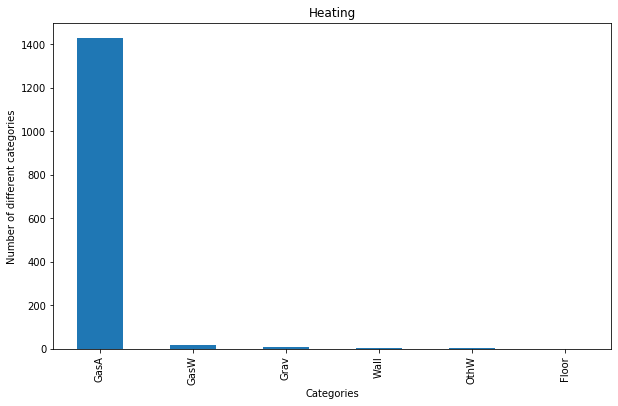

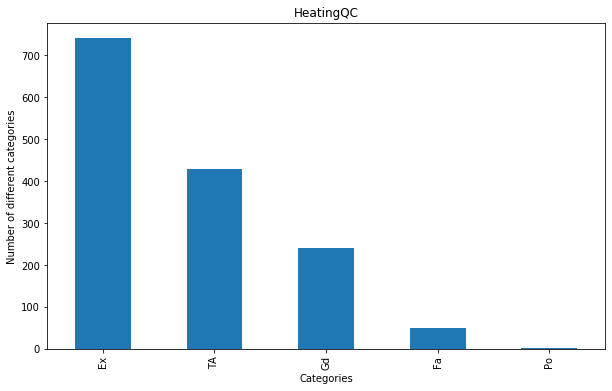

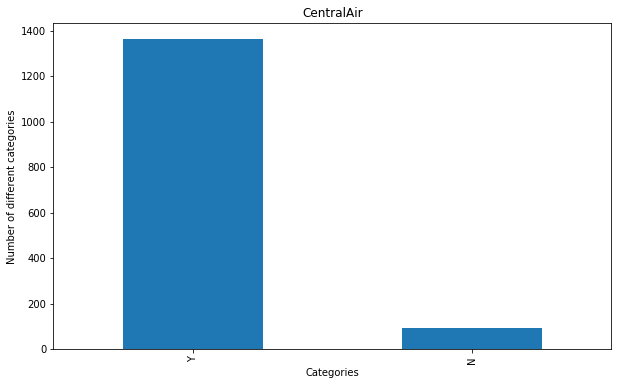

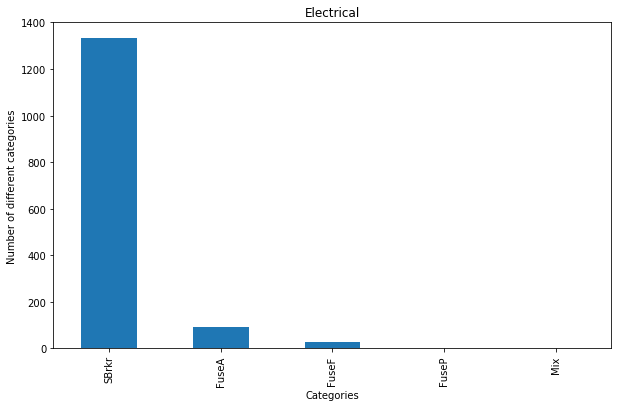

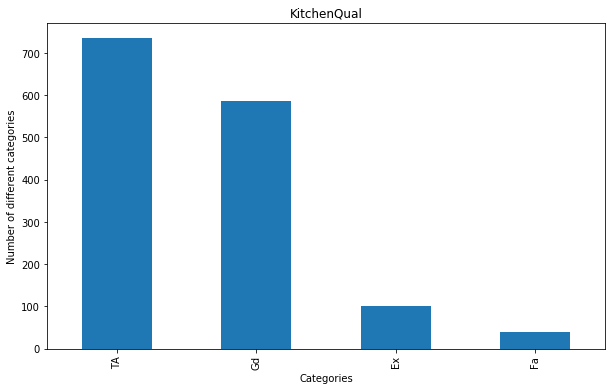

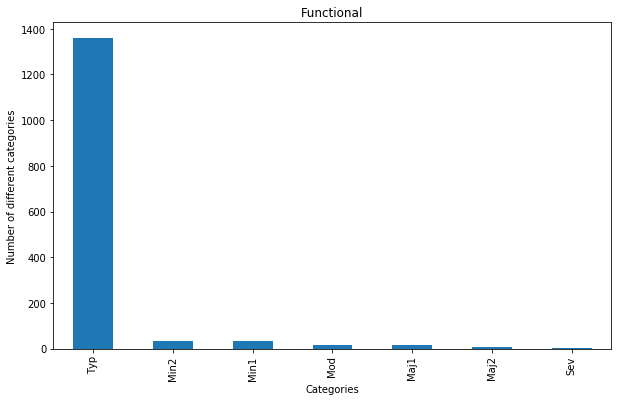

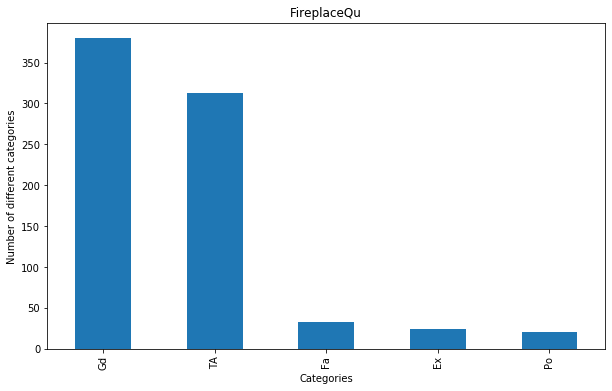

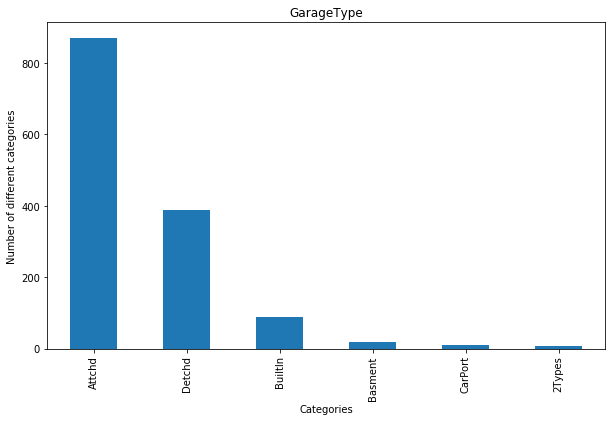

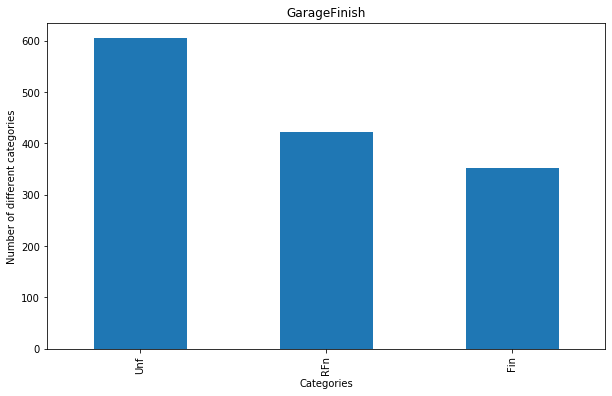

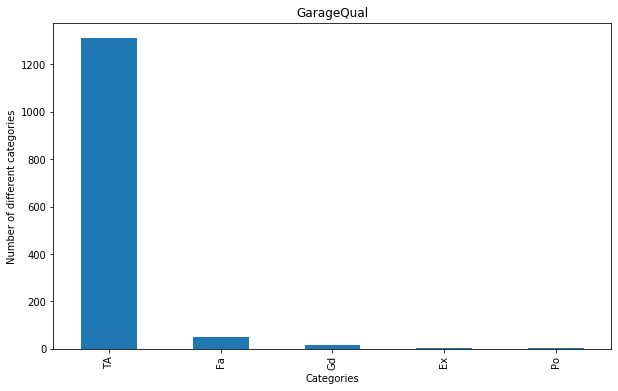

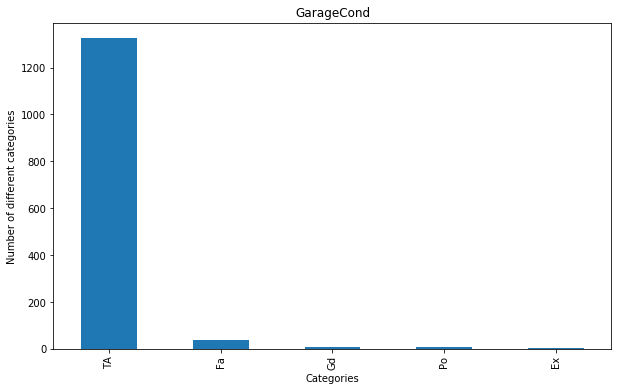

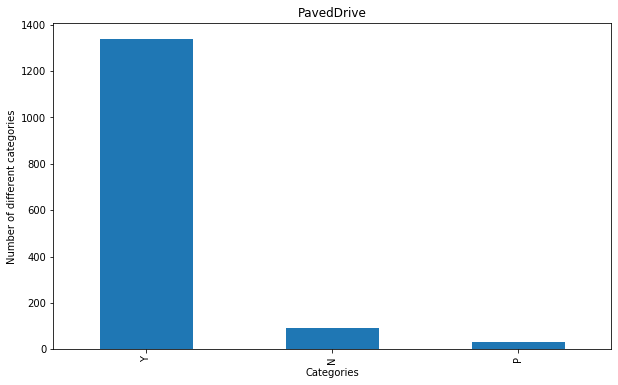

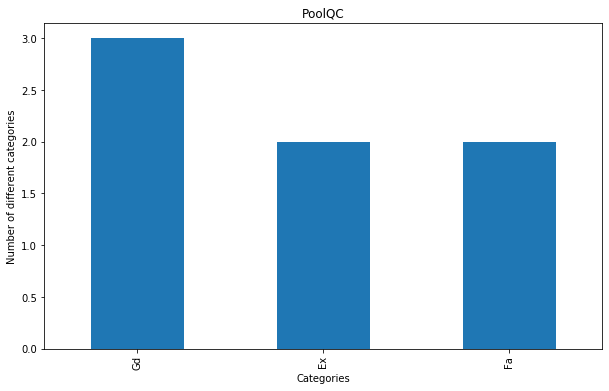

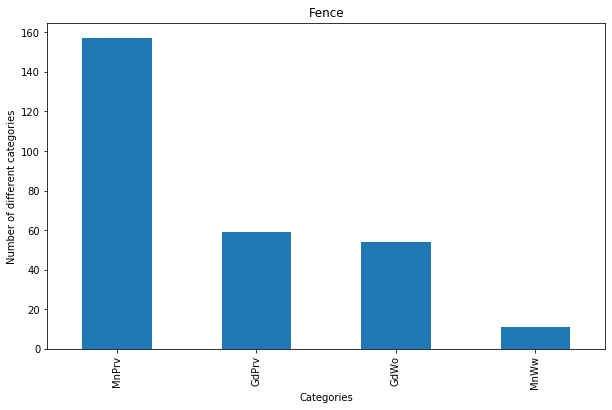

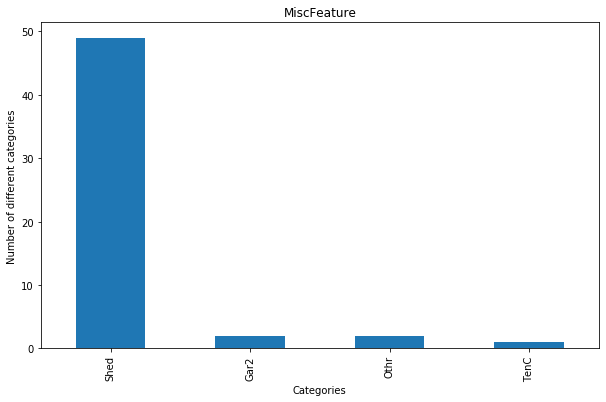

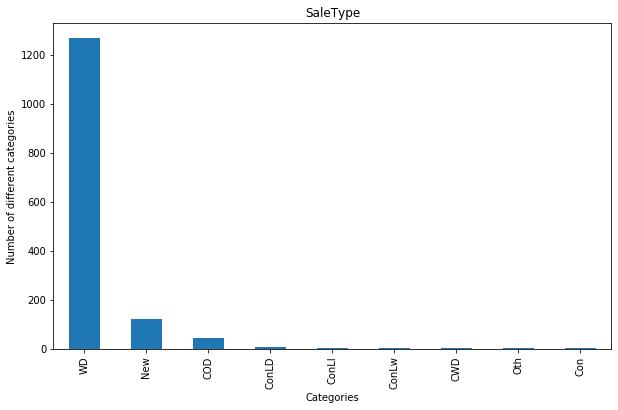

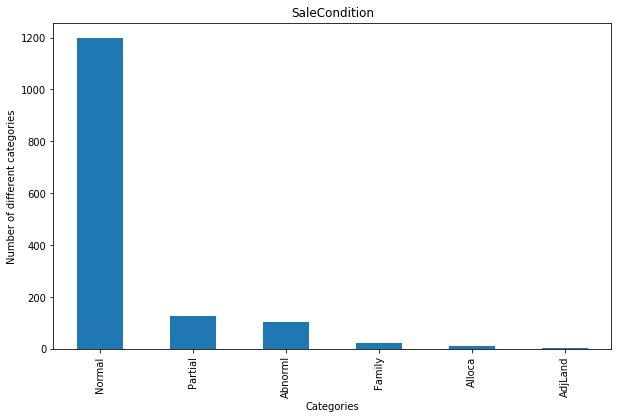

In [16]:
for var in categorical:
    df[var].value_counts().sort_values(ascending=False).plot.bar(figsize = (10,6))
    plt.title(var)
    plt.xlabel('Categories')
    plt.ylabel('Number of different categories')
    plt.show()



## Feature Engineering

### Separate train and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Id','SalePrice'], axis =1),
                                                             df['SalePrice'],
                                                             test_size = 0.1,
                                                             random_state = 0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

### Temporal variables

In [18]:
# function to calculate elapsed time

def elapsed_years (df, var):
    df[var] = df['YrSold'] - df[var]
    return df    

In [19]:
for var in ['YearBuilt','YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test,var)

In [20]:
X_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


Instead of the "year", now we have the amount of years that passed since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [21]:
# drop YrSold
X_train.drop ('YrSold', axis=1, inplace = True)
X_test.drop('YrSold', axis=1, inplace =True)

In [22]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

### Missing Data Imputation

#### Continuous Variables

In [23]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous:

# remove YrSold from the variable list
# because it is no longer in our dataset
years_var.remove('YrSold')

# examine percentage of missing values
for col in numerical+years_var:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


Imputation technique to use: **additional variable with NA + median imputation** As the distribution is not normal in case of all the missing numerical variables

In [24]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


Imputation technique to use: **Add missing label to categorical variables**

In [25]:
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

### Putting it all together

In [26]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [27]:
house_pipe = Pipeline([
    
    # missing data imputation - section 4
    ('missing_ind', mdi.AddMissingIndicator(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=numerical+years_var)),
    
    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

    # categorical encoding - section 6
    ('rare_label_enc', ce.RareLabelEncoder(
        tol=0.05, n_categories=6, variables=categorical+discrete)),
    
    ('categorical_enc', ce.OrdinalEncoder(
        encoding_method='ordered', variables=categorical+discrete)),

    # discretisation + encoding - section 8
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=numerical)),
    
    ('encoding', ce.OrdinalEncoder(
        encoding_method='ordered', variables=numerical)),

    # feature Scaling - section 10
    ('scaler', StandardScaler())
    
]) 
    

In [28]:
house_pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/opt/anaconda3/lib/python3.7/site-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/opt/anaconda3/lib/python3.7/site-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/opt/anaconda3/lib/python3.7/site-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable LotShape is 

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(variables=['LotFrontage', 'LotArea',
                                              'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF',
                                              'TotalBsmtSF', '1stFlrSF',
                                              '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'GarageArea',
                                              'WoodDeckSF', 'OpenPorchSF',
                                              'EnclosedPorch', '3SsnP...
                                                      'EnclosedPorch',
                                                      '3SsnPorch',
                                                      'ScreenPorch',

In [29]:
X_train_t = house_pipe.transform(X_train)
X_test_t = house_pipe.transform(X_test)

In [54]:
# print(X_train.head())

In [55]:
# for column in X_train.columns:
#     print('''
#     <label> {}</label><br>
#     <input type = "text" name  = "{}" <br><br>
# '''.format(column, column))



In [56]:
for column in X_train.columns:
    print('''
    {} = request.form.get('{}')
'''.format(column, column))




    MSSubClass = request.form.get('MSSubClass')


    MSZoning = request.form.get('MSZoning')


    LotFrontage = request.form.get('LotFrontage')


    LotArea = request.form.get('LotArea')


    Street = request.form.get('Street')


    Alley = request.form.get('Alley')


    LotShape = request.form.get('LotShape')


    LandContour = request.form.get('LandContour')


    Utilities = request.form.get('Utilities')


    LotConfig = request.form.get('LotConfig')


    LandSlope = request.form.get('LandSlope')


    Neighborhood = request.form.get('Neighborhood')


    Condition1 = request.form.get('Condition1')


    Condition2 = request.form.get('Condition2')


    BldgType = request.form.get('BldgType')


    HouseStyle = request.form.get('HouseStyle')


    OverallQual = request.form.get('OverallQual')


    OverallCond = request.form.get('OverallCond')


    YearBuilt = request.form.get('YearBuilt')


    YearRemodAdd = request.form.get('YearRemodAdd')


    RoofStyle = request.for

In [57]:
columnss = []
for column in X_train.columns:
    columnss.append(column)
print(columnss)


['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [58]:
len(columnss)

78

## Model Selection

### Multiple Linear Regression

In [30]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
## Training the model on train set
lin_regressor = LinearRegression()
lin_regressor.fit(X_train_t, y_train)

LinearRegression()

In [32]:
## Predicting the Test set results
y_pred = lin_regressor.predict(X_test_t)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis = 1))


[[214179.75 200624.  ]
 [123653.28 133000.  ]
 [117829.55 110000.  ]
 [223806.77 192000.  ]
 [ 86392.76  88000.  ]
 [ 81648.02  85000.  ]
 [278715.42 282922.  ]
 [137302.69 141000.  ]
 [340928.57 745000.  ]
 [167580.22 148800.  ]
 [210452.23 208900.  ]
 [118078.37 136905.  ]
 [247984.92 225000.  ]
 [120368.26 123000.  ]
 [131256.6  119200.  ]
 [132713.66 145000.  ]
 [240297.38 190000.  ]
 [107887.97 123600.  ]
 [155107.62 149350.  ]
 [166479.33 155000.  ]
 [128771.77 166000.  ]
 [144343.32 144500.  ]
 [ 72631.92 110000.  ]
 [148954.31 174000.  ]
 [226966.86 185000.  ]
 [229147.53 168000.  ]
 [171268.59 177500.  ]
 [115796.16  84500.  ]
 [334414.6  320000.  ]
 [ 87603.   118500.  ]
 [184417.73 110000.  ]
 [223222.55 213000.  ]
 [147695.34 156000.  ]
 [303652.33 250000.  ]
 [324694.35 372500.  ]
 [208807.61 175000.  ]
 [296546.68 277500.  ]
 [117547.92 112500.  ]
 [224219.27 263000.  ]
 [307968.99 325000.  ]
 [210612.3  243000.  ]
 [113260.26 130000.  ]
 [208691.92 164990.  ]
 [299917.07

In [33]:
## Evaluating the Model Performance
r2_score(y_test, y_pred)

0.7083263767128779

### Polynomial Regression

In [34]:
## Training the model on train set
poly_regressor = PolynomialFeatures(degree = 2 )
X_poly = poly_regressor.fit_transform(X_train_t)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)

LinearRegression()

In [35]:
## Predicting the Test set results
y_pred = lin_reg2.predict(poly_regressor.transform(X_test_t))
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis = 1))


[[222473.29 200624.  ]
 [118011.35 133000.  ]
 [204451.34 110000.  ]
 [253315.22 192000.  ]
 [ 64930.55  88000.  ]
 [128568.7   85000.  ]
 [229612.14 282922.  ]
 [122624.38 141000.  ]
 [ 77421.74 745000.  ]
 [147382.44 148800.  ]
 [168418.6  208900.  ]
 [151061.89 136905.  ]
 [329774.66 225000.  ]
 [ 71861.75 123000.  ]
 [ 86330.27 119200.  ]
 [ 96570.87 145000.  ]
 [190891.83 190000.  ]
 [123240.94 123600.  ]
 [ 78862.86 149350.  ]
 [293399.22 155000.  ]
 [203148.27 166000.  ]
 [169285.29 144500.  ]
 [-64474.09 110000.  ]
 [193920.31 174000.  ]
 [180976.94 185000.  ]
 [246109.85 168000.  ]
 [180896.72 177500.  ]
 [ 62997.59  84500.  ]
 [328460.98 320000.  ]
 [ 41603.25 118500.  ]
 [161686.17 110000.  ]
 [167633.68 213000.  ]
 [131497.41 156000.  ]
 [290190.23 250000.  ]
 [357655.87 372500.  ]
 [269367.75 175000.  ]
 [333060.63 277500.  ]
 [172048.38 112500.  ]
 [260796.8  263000.  ]
 [357481.81 325000.  ]
 [224230.61 243000.  ]
 [ -3682.4  130000.  ]
 [204453.64 164990.  ]
 [291012.08

In [36]:
## Evaluating the Model Performance
r2_score(y_test, y_pred)

0.03494438641676312

### Support Vector Regression (SVR)

In [37]:
## Training the model on train set
sc_y = StandardScaler()
y_train_t = sc_y.fit_transform(y_train.reshape(len(y_train),1)) 

svr_regressor = SVR(kernel = 'poly')
svr_regressor.fit(X_train_t, y_train_t)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='poly')

In [38]:
## Predicting the Test set results
y_pred = sc_y.inverse_transform(svr_regressor.predict(X_test_t))
print(np.concatenate((y_pred.reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),axis = 1))

[[202254.62 200624.  ]
 [113083.16 133000.  ]
 [128379.55 110000.  ]
 [201933.02 192000.  ]
 [108032.36  88000.  ]
 [ 90011.68  85000.  ]
 [254636.86 282922.  ]
 [153419.14 141000.  ]
 [309057.23 745000.  ]
 [161221.24 148800.  ]
 [200783.56 208900.  ]
 [160328.58 136905.  ]
 [246253.9  225000.  ]
 [126241.05 123000.  ]
 [143129.3  119200.  ]
 [139598.97 145000.  ]
 [209356.77 190000.  ]
 [110173.14 123600.  ]
 [156417.57 149350.  ]
 [170644.39 155000.  ]
 [120475.9  166000.  ]
 [155951.23 144500.  ]
 [ 72962.41 110000.  ]
 [164578.06 174000.  ]
 [189657.81 185000.  ]
 [190133.95 168000.  ]
 [168315.95 177500.  ]
 [ 81737.64  84500.  ]
 [342875.97 320000.  ]
 [ 94290.59 118500.  ]
 [153479.49 110000.  ]
 [181748.29 213000.  ]
 [152975.24 156000.  ]
 [292485.43 250000.  ]
 [319736.69 372500.  ]
 [173902.22 175000.  ]
 [314097.83 277500.  ]
 [126564.72 112500.  ]
 [227057.07 263000.  ]
 [341221.4  325000.  ]
 [183484.16 243000.  ]
 [146648.21 130000.  ]
 [189776.88 164990.  ]
 [268120.17

In [39]:
## Evaluating the Model Performance
r2_score(y_test, y_pred)

0.7191199008280155

### Regression Trees

In [40]:
## Training the model on train set
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(X_train_t, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
## Predicting the Test set results
y_pred = dtregressor.predict(X_test_t)
print(np.concatenate((y_pred.reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),axis = 1))

[[260000. 200624.]
 [135000. 133000.]
 [133500. 110000.]
 [190000. 192000.]
 [119500.  88000.]
 [107000.  85000.]
 [293077. 282922.]
 [159434. 141000.]
 [625000. 745000.]
 [160000. 148800.]
 [194500. 208900.]
 [135000. 136905.]
 [226000. 225000.]
 [129500. 123000.]
 [129500. 119200.]
 [148000. 145000.]
 [205000. 190000.]
 [132500. 123600.]
 [132000. 149350.]
 [118500. 155000.]
 [124000. 166000.]
 [144000. 144500.]
 [ 84000. 110000.]
 [173900. 174000.]
 [204000. 185000.]
 [191000. 168000.]
 [177000. 177500.]
 [ 75500.  84500.]
 [337500. 320000.]
 [119000. 118500.]
 [124000. 110000.]
 [175000. 213000.]
 [148000. 156000.]
 [305000. 250000.]
 [265000. 372500.]
 [241500. 175000.]
 [227680. 277500.]
 [129500. 112500.]
 [219500. 263000.]
 [302000. 325000.]
 [215000. 243000.]
 [155000. 130000.]
 [159895. 164990.]
 [274900. 280000.]
 [348000. 403000.]
 [143900. 119000.]
 [117000. 125000.]
 [130000. 128200.]
 [180000. 172500.]
 [108000.  84900.]
 [333168. 412500.]
 [145000. 156000.]
 [179200. 16

In [42]:
## Evaluating the Model Performance
r2_score(y_test, y_pred)

0.8539994919763533

### Random Forest

In [43]:
## Training the model on train set
rfregressor = RandomForestRegressor(n_estimators =10, random_state = 0)
rfregressor.fit(X_train_t, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [44]:
## Predicting the Test set results
y_pred = rfregressor.predict(X_test_t)
print(np.concatenate((y_pred.reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),axis = 1))

[[248450.  200624. ]
 [129950.  133000. ]
 [121120.8 110000. ]
 [207290.  192000. ]
 [102680.   88000. ]
 [111325.   85000. ]
 [248773.9 282922. ]
 [132530.  141000. ]
 [525573.5 745000. ]
 [167313.3 148800. ]
 [202206.  208900. ]
 [159420.  136905. ]
 [235112.5 225000. ]
 [113156.6 123000. ]
 [118600.  119200. ]
 [139240.  145000. ]
 [231051.5 190000. ]
 [123090.  123600. ]
 [140435.  149350. ]
 [155104.  155000. ]
 [140730.  166000. ]
 [143770.  144500. ]
 [102530.  110000. ]
 [174933.2 174000. ]
 [183190.  185000. ]
 [183359.  168000. ]
 [157263.3 177500. ]
 [ 89650.   84500. ]
 [331662.4 320000. ]
 [115550.8 118500. ]
 [146570.  110000. ]
 [185923.5 213000. ]
 [145330.  156000. ]
 [325458.  250000. ]
 [318496.9 372500. ]
 [204616.5 175000. ]
 [289279.3 277500. ]
 [131045.  112500. ]
 [235880.  263000. ]
 [311738.6 325000. ]
 [199900.  243000. ]
 [140540.  130000. ]
 [181137.8 164990. ]
 [304478.9 280000. ]
 [351471.  403000. ]
 [151850.  119000. ]
 [119810.  125000. ]
 [128630.  12

In [45]:
## Evaluating the Model Performance
r2_score(y_test, y_pred)

0.8681215863463035

## Export the model using Pickle

In [47]:
pickle.dump(rfregressor, open('housingprice_model.pkl','wb'))